# <CENTER>TEXT CLASSIFICATION

# ASSIGNMENT-7 03/20/2024

## IMPORTING PANDAS TO READ FILE

This code reads a CSV file named "Corona_NLP_train.csv" using pandas, specifying a different encoding ('latin1') than the default. Then, it displays the first few rows of the dataframe using the `head()` function.

In [3]:
# Importing modules
import pandas as pd

# Read the CSV file with a different encoding
df = pd.read_csv("C:\\Users\\laxmi\\Desktop\\Corona_NLP_train.csv", encoding='latin1')

df.head()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


## VALUE COUNTS OF SENTIMENT

This code creates a bar plot showing the count of each unique value in the 'Sentiment' column of the dataframe `df`. The counts are sorted by the index of the unique values.

<Axes: xlabel='Sentiment'>

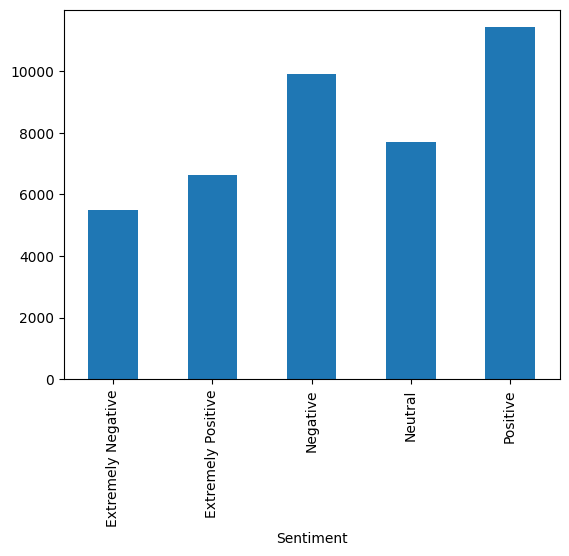

In [4]:
df['Sentiment'].value_counts().sort_index().plot(kind='bar')


## TEXT CLEANING FUNCTION

 THE CLEAN FUNCTION TAKES TEXT INPUT AND PERFORMS SEVERAL CLEANING OPERATIONS INCLUDING CONVERTING HTML ESCAPES, REMOVING HTML TAGS, EXTRACTING MARKDOWN URLS, REMOVING TEXT IN BRACKETS, ELIMINATING SPECIAL CHARACTERS AND HYPHENS, AND REDUCING SEQUENCES OF WHITESPACES. THE FINAL TEXT IS RETURNED STRIPPED OF LEADING AND TRAILING WHITESPACES.

In [6]:
import html
import re
def clean(text):
    # convert html escapes like & to characters.
    text = html.unescape(text) 
    # tags like 
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches  but not #cool
    text = re.sub(r'(?:^|\s)[<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip()


## DATA CLEANING

In [7]:
df = df[['OriginalTweet','Sentiment']]
df = df.dropna()
df['text'] = df['OriginalTweet'] 
#df = df.drop(columns=['reviewText','summary']) 
df['text'] = df['text'].apply(clean)
df = df[df['text'].str.len() > 50]
df.sample(2)


,OriginalTweet,Sentiment,text
171,Mass hysteria isnÂt going to successfully dea...,Extremely Negative,Mass hysteria isnÂt going to successfully dea...
24624,Imagine if our Trading Standards took the same...,Neutral,Imagine if our Trading Standards took the same...


## TRAIN-TEST SPLIT

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],
                                                    df['Sentiment'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['Sentiment'])

print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])


Size of Training Data  32549
Size of Test Data  8138


## CONVERTING X_TRAIN TO NUMBERS

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
tfidf = TfidfVectorizer(min_df = 10, ngram_range=(1,2), stop_words="english")
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)


## BUILDING THE MODEL

In [10]:
from sklearn.svm import LinearSVC

model1 = LinearSVC(random_state=0, tol=1e-5)
model1.fit(X_train_tf, Y_train)


C:\Users\laxmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(random_state=0, tol=1e-05)

## ACCURACY OF MODEL

This code snippet calculates and prints the accuracy score of a machine learning model's predictions on test data using scikit-learn's `accuracy_score` function.

In [11]:
#Accuracy: # of correct prediction/# of predictions

from sklearn.metrics import accuracy_score

Y_pred = model1.predict(X_test_tf)
print ('Accuracy Score - ', accuracy_score(Y_test, Y_pred))


Accuracy Score -  0.5399361022364217


## DUMMY CLASSIFIER

Dummy Classifier from scikit-learn to establishES a baseline performance for a classification task. The classifier is set to predict the most frequent class in the training data (`strategy='most_frequent'`). After fitting the classifier on the training data (`X_train`, `Y_train`), it predicts labels for the test data (`X_test`). The accuracy score of these predictions is then calculated and printed using the `accuracy_score` function.

In [12]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent', random_state=42)
clf.fit(X_train, Y_train)
Y_pred_baseline = clf.predict(X_test)
print ('Accuracy Score - ', accuracy_score(Y_test, Y_pred_baseline))


Accuracy Score -  0.27844679282378965


## PREDICITION OF VALUES

In [13]:

from sklearn.metrics import confusion_matrix
Y_pred = model1.predict(X_test_tf)
confusion_matrix(Y_test, Y_pred)


array([[ 642,   13,  338,   44,   57],
       [  12,  803,   58,   45,  404],
       [ 359,   68,  896,  281,  360],
       [  18,   23,  220,  959,  272],
       [  58,  382,  395,  337, 1094]], dtype=int64)

## CONFUSION MATRIX

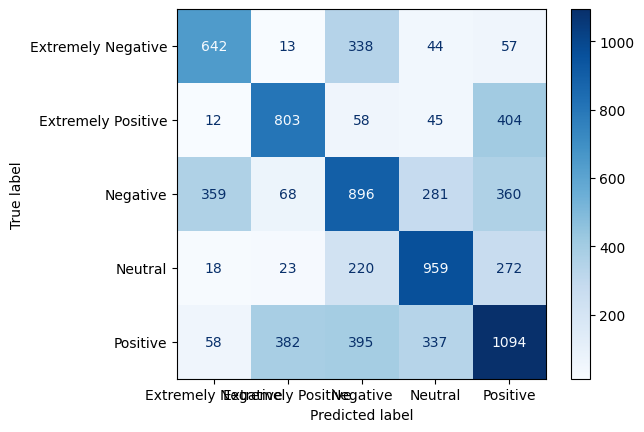

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(Y_test, model1.predict(X_test_tf))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot(values_format='d', cmap=plt.cm.Blues)
plt.show()


# CLASSIFICATION REPORT

In [15]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))


                    precision    recall  f1-score   support

Extremely Negative       0.59      0.59      0.59      1094
Extremely Positive       0.62      0.61      0.62      1322
          Negative       0.47      0.46      0.46      1964
           Neutral       0.58      0.64      0.61      1492
          Positive       0.50      0.48      0.49      2266

          accuracy                           0.54      8138
         macro avg       0.55      0.56      0.55      8138
      weighted avg       0.54      0.54      0.54      8138



## DOWNSAMPLING

It samples 400 instances labeled as 'Positive' and creates a separate DataFrame ('df_sampleP3') containing them. Then, it extracts all other instances labeled as not 'Positive' into another DataFrame ('df_sampleRest'). Finally, it concatenates these two DataFrames to create a new balanced dataset ('df_balanced'). Afterward, it checks the distribution of sentiment classes in the balanced dataset.

In [17]:
df_sampleP3 = df[df['Sentiment'] == 'Positive'].sample(n=400, random_state=123)

# Create a separate dataframe containing all other bug reports
df_sampleRest = df[df['Sentiment'] != 'Positive']

# Concatenate the two dataframes to create the new balanced bug reports dataset
df_balanced = pd.concat([df_sampleRest, df_sampleP3])

# Check the status of the class imbalance
df_balanced['Sentiment'].value_counts()


Sentiment
Negative              9821
Neutral               7459
Extremely Positive    6607
Extremely Negative    5469
Positive               400
Name: count, dtype: int64

# REPEATING EVERYTHING

In [18]:
from sklearn.metrics import classification_report
# Loading the balanced dataframe

df = df_balanced[['text', 'Sentiment']]
df = df.dropna()

# Step 1 - Data Preparation

df['text'] = df['text'].apply(clean)

# Step 2 - Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],
                                                    df['Sentiment'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['Sentiment'])
print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

# Step 3 - Training the Machine Learning model

tfidf = TfidfVectorizer(min_df=10, ngram_range=(1, 2), stop_words="english")
X_train_tf = tfidf.fit_transform(X_train)

model1 = LinearSVC(random_state=0, tol=1e-5)
model1.fit(X_train_tf, Y_train)

# Step 4 - Model Evaluation

X_test_tf = tfidf.transform(X_test)
Y_pred = model1.predict(X_test_tf)
print('Accuracy Score - ', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))


Size of Training Data  23804
Size of Test Data  5952


C:\Users\laxmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy Score -  0.6646505376344086
                    precision    recall  f1-score   support

Extremely Negative       0.60      0.59      0.59      1094
Extremely Positive       0.83      0.85      0.84      1322
          Negative       0.57      0.54      0.56      1964
           Neutral       0.68      0.75      0.71      1492
          Positive       0.00      0.00      0.00        80

          accuracy                           0.66      5952
         macro avg       0.54      0.55      0.54      5952
      weighted avg       0.65      0.66      0.66      5952



## REPEATING AGAIN

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
# Flag that determines the choice of SVC (True) and LinearSVC (False)
runSVC = True
df = pd.read_csv("C:\\Users\\laxmi\\Desktop\\Corona_NLP_train.csv", encoding='latin1')
df = df[['OriginalTweet','Sentiment']]
df = df.dropna()
df['text'] = df['OriginalTweet']
df['text'] = df['text'].apply(clean)
df = df[df['text'].str.len() > 50]


# Step 1 - Data Preparation
df['text'] = df['text'].apply(clean)
df = df[df['text'].str.len() > 50]
if (runSVC):
    # Sample the data when running SVC to ensure reasonable run-times
    df = df.groupby('Sentiment', as_index=False).apply(pd.DataFrame.sample,
                                                       random_state=42,
                                                       frac=.2)
# Step 2 - Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],
                                                    df['Sentiment'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['Sentiment'])
print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])
# Step 3 - Training the Machine Learning model
tfidf = TfidfVectorizer(stop_words="english")
if (runSVC):
    model = SVC(random_state=42, probability=True)
    grid_param = [{
        'tfidf__min_df': [5, 10],
        'tfidf__ngram_range': [(1, 3), (1, 6)],
        'model__C': [1, 100],
        'model__kernel': ['linear']
    }]
else:
    model = LinearSVC(random_state=42, tol=1e-5)
    grid_param = {
        'tfidf__min_df': [5, 10],
        'tfidf__ngram_range': [(1, 3), (1, 6)],
        'model__C': [1, 100],
        'model__loss': ['hinge']
    }
training_pipeline = Pipeline(
    steps=[('tfidf', TfidfVectorizer(stop_words="english")), ('model', model)])
gridSearchProcessor = GridSearchCV(estimator=training_pipeline,
                                   param_grid=grid_param,
                                   cv=5)
gridSearchProcessor.fit(X_train, Y_train)
best_params = gridSearchProcessor.best_params_
print("Best alpha parameter identified by grid search ", best_params)

best_result = gridSearchProcessor.best_score_
print("Best result identified by grid search ", best_result)

best_model = gridSearchProcessor.best_estimator_

# Step 4 - Model Evaluation

Y_pred = best_model.predict(X_test)
print('Accuracy Score - ', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))


C:\Users\laxmi\AppData\Local\Temp\ipykernel_4316\2669012754.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Sentiment', as_index=False).apply(pd.DataFrame.sample,


Size of Training Data  6509
Size of Test Data  1628
Best alpha parameter identified by grid search  {'model__C': 1, 'model__kernel': 'linear', 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 6)}
Best result identified by grid search  0.445537463206254
Accuracy Score -  0.4735872235872236
                    precision    recall  f1-score   support

Extremely Negative       0.57      0.39      0.46       219
Extremely Positive       0.64      0.43      0.52       264
          Negative       0.40      0.46      0.43       393
           Neutral       0.55      0.50      0.53       299
          Positive       0.42      0.53      0.47       453

          accuracy                           0.47      1628
         macro avg       0.52      0.46      0.48      1628
      weighted avg       0.49      0.47      0.48      1628

